<a href="https://colab.research.google.com/github/Muhammad-Abdullah-Jami/UK_Bank_Stocks_Prediction/blob/main/Yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation of essential Libraries**

In [1]:
!pip install yfinance


**Importing Libraries**

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

**Data Loading and preprocessing**

In [3]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
df = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Display the first few rows of the data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L
Date,,,,,,
2019-01-02 00:00:00+00:00,501.606323,606.400024,607.700012,584.099976,596.000000,4442051
2019-01-03 00:00:00+00:00,485.310577,586.700012,610.799988,582.700012,596.599976,7359146
2019-01-04 00:00:00+00:00,502.764282,607.799988,611.200012,596.000000,597.400024,7283237
2019-01-07 00:00:00+00:00,491.845398,594.599976,609.599976,590.900024,606.900024,7184535
2019-01-08 00:00:00+00:00,507.065643,613.000000,623.500000,593.599976,596.799988,7575939


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1261 entries, 2019-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, STAN.L)  1261 non-null   float64
 1   (Close, STAN.L)      1261 non-null   float64
 2   (High, STAN.L)       1261 non-null   float64
 3   (Low, STAN.L)        1261 non-null   float64
 4   (Open, STAN.L)       1261 non-null   float64
 5   (Volume, STAN.L)     1261 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.0 KB


In [5]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1.261000e+03
mean,512.525411,567.990634,575.304779,560.508252,567.368439,7.753292e+06
std,104.083527,111.144439,111.080875,110.804058,110.558282,3.894145e+06
min,299.323364,336.799988,346.862000,334.250000,340.700012,6.793360e+05
25%,419.479309,466.100006,473.700012,459.200012,465.700012,5.175427e+06
50%,521.905273,585.599976,593.000000,578.599976,586.799988,6.721285e+06
75%,590.401428,661.000000,667.200012,654.200012,659.599976,9.140959e+06
max,750.497864,790.799988,799.400024,784.400024,790.400024,3.080891e+07


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,STAN.L,0
Close,STAN.L,0
High,STAN.L,0
Low,STAN.L,0
Open,STAN.L,0
Volume,STAN.L,0


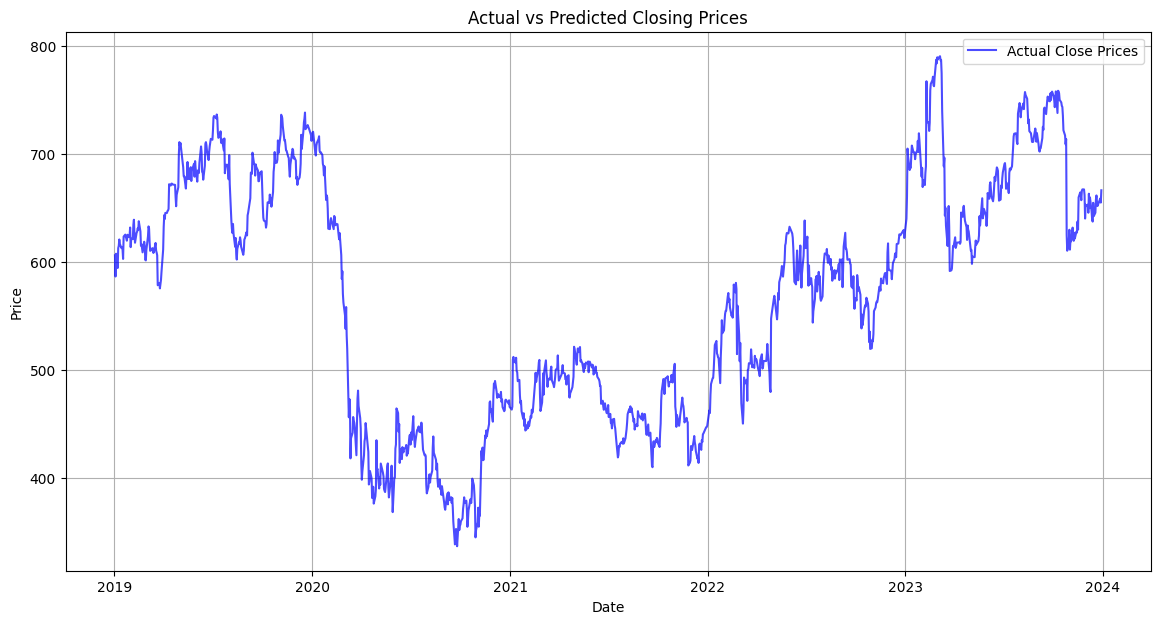

In [7]:
df.reset_index(inplace=True)

# Plot actual vs predicted closing prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Close Prices', color='blue', alpha=0.7)
# Adding titles and labels
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

**Feature Engineering**

In [17]:
# Test feature engineering code

# Define window size and alpha for moving averages
window_size = 20  # 20-day SMA for example
alpha = 0.5

# Calculate Cumulative Moving Average (CMA)
df['CMA_Close'] = df['Close'].expanding().mean()

# Calculate Simple Moving Average (SMA) with a specified window size
df['SMA_Close'] = df['Close'].rolling(window=window_size).mean()

# Calculate Exponential Moving Average (EMA) with specified alpha
df['EMA_Close'] = df['Close'].ewm(alpha=alpha, min_periods=window_size).mean()


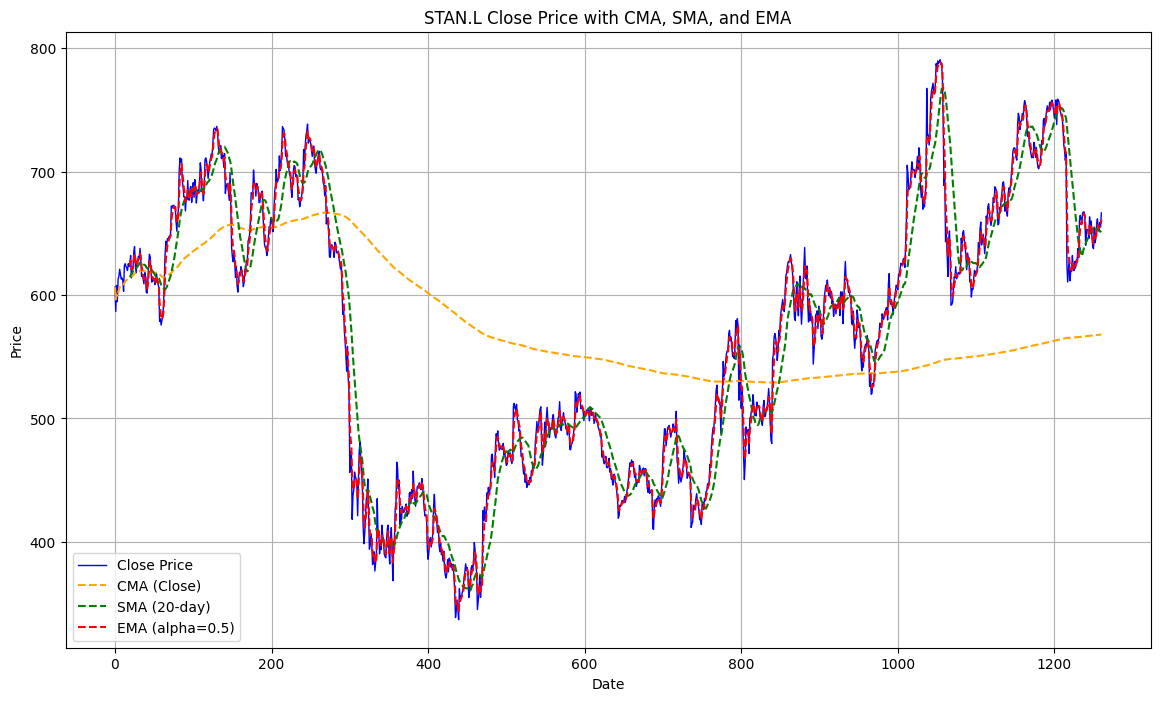

In [9]:
# Plotting Close prices along with CMA, SMA, and EMA
plt.figure(figsize=(14, 8))

# Plot the actual Close prices
plt.plot(df.index, df[('Close', 'STAN.L')], label='Close Price', color='blue', linewidth=1)

# Plot the Cumulative Moving Average (CMA)
plt.plot(df.index, df[('CMA_Close', 'STAN.L')], label='CMA (Close)', color='orange', linestyle='--')

# Plot the Simple Moving Average (SMA)
plt.plot(df.index, df[('SMA_Close', 'STAN.L')], label=f'SMA ({window_size}-day)', color='green', linestyle='--')

# Plot the Exponential Moving Average (EMA)
plt.plot(df.index, df[('EMA_Close', 'STAN.L')], label=f'EMA (alpha={alpha})', color='red', linestyle='--')

# Add titles and labels
plt.title('STAN.L Close Price with CMA, SMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

**random forest**

In [15]:
# Ensure index is in datetime format
df.index = pd.to_datetime(df.index)

# Define features and target variable
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Define future dates starting from the end of 2024 for one year into 2025
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')
future_data = pd.DataFrame(index=future_dates, columns=X.columns)

# Fill future data with the last known values for Open, High, Low, Close, and Volume
for col in X.columns:
    future_data[col] = df[col].iloc[-1]

# Predict stock prices for the next year
future_predictions_1y = rf_model.predict(future_data)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Display accuracy metrics
print("Model Performance Metrics")
print("-" * 30)
print(f"Mean Squared Error (MSE):       {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE):      {mae:.4f}")
print("-" * 30)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Performance Metrics
------------------------------
Mean Squared Error (MSE):       0.3415
Root Mean Squared Error (RMSE): 0.5844
Mean Absolute Error (MAE):      0.3219
------------------------------


<ipython-input-15-3b3516ee4963>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')


<ipython-input-16-54b1ae5d88e3>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')


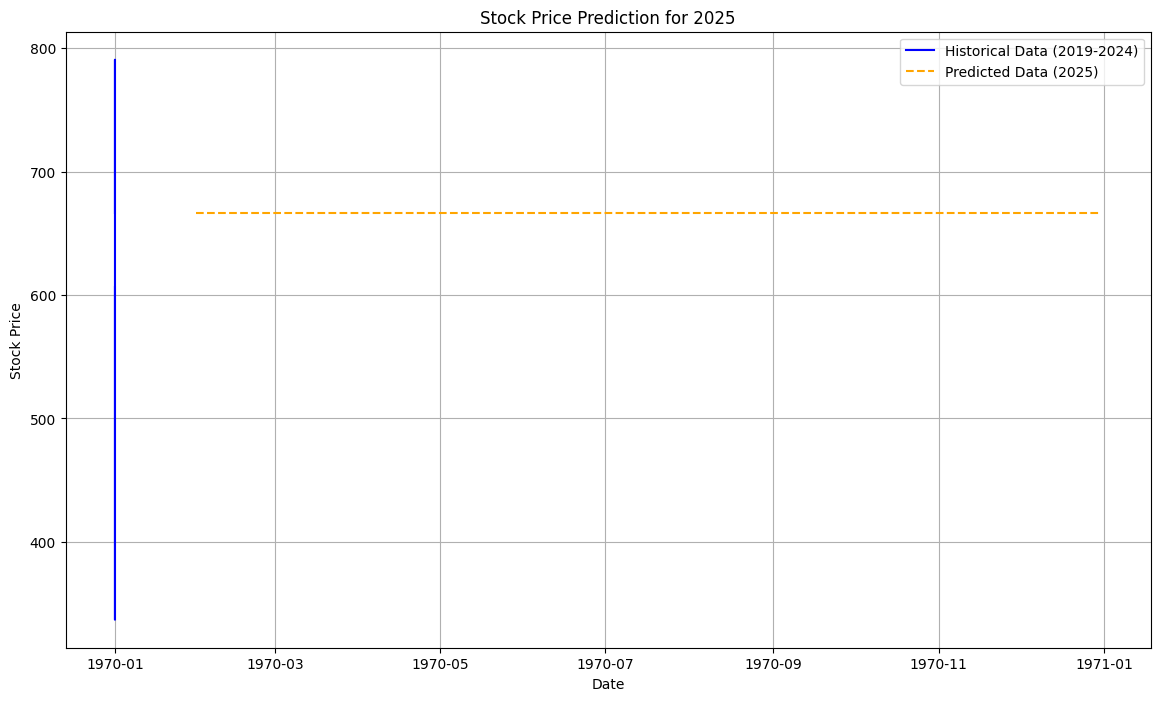

In [16]:


# Define future dates for 2025 predictions
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')
future_data = pd.DataFrame(index=future_dates, columns=X.columns)

# Fill future data with last known values to simulate stable conditions
for col in X.columns:
    future_data[col] = df[col].iloc[-1]

# Predict future prices for 2025
future_predictions = rf_model.predict(future_data)

# Create a DataFrame for future predictions with dates as index
predicted_2025 = pd.DataFrame({'Close': future_predictions}, index=future_dates)

# Combine historical and future data
df_combined = pd.concat([df[['Close']], predicted_2025])

# Plot historical (2019-2024) and predicted (2025) data
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Historical Data (2019-2024)', color='blue')
plt.plot(predicted_2025.index, predicted_2025['Close'], label='Predicted Data (2025)', color='orange', linestyle='--')

# Add title and labels
plt.title('Stock Price Prediction for 2025')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X= df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y= df['Close'].values
y_binned = np.digitize(y, bins=np.linspace(y.min(), y.max(), 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model= RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print(f'mean_squared_error:{mse}')
feature_importances = rf_model.feature_importances_
print("Feature Importances: ", feature_importances)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


mean_squared_error:24.720846035791908
Feature Importances:  [6.88200536e-04 1.04248568e-01 8.43179669e-01 5.17192452e-02
 1.64317540e-04]


Accuracy: 0.9367588932806324
F1 Score: 0.9367828165286528


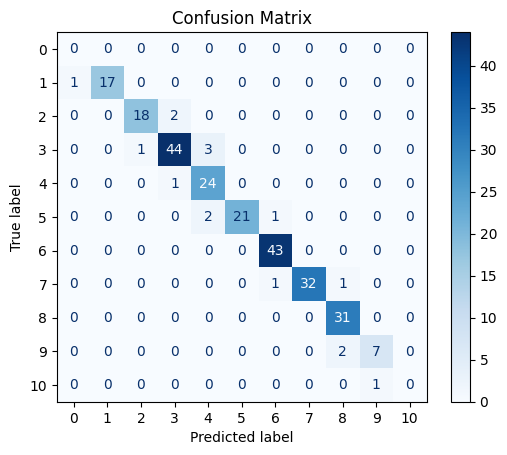

In [ ]:
# creating bins for the continue and discreate data seprations for plottinh
bins = np.linspace(y_test.min(), y_test.max(), 10)

y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)

# Calculating the  accuracy  and F1 score from binned values
accuracy = accuracy_score(y_test_binned, y_pred_binned)
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Ploting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'index'

**Extra code for better isight for data or preprocessing or model**

In [ ]:
# Calculating the number of years
start_year = df.index[0].year
end_year = df.index[-1].year
years_of_data = end_year - start_year + 1

print(f"Years of data: {years_of_data}")


In [ ]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
stock = yf.Ticker(ticker)

#Stock metadata
metadata = stock.info
metadata


{'address1': '1 Basinghall Avenue',
 'city': 'London',
 'zip': 'EC2V 5DD',
 'country': 'United Kingdom',
 'phone': '44 20 7885 8888',
 'fax': '44 20 7885 9999',
 'website': 'https://www.sc.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Standard Chartered PLC, together with its subsidiaries, provides various banking products and services in Asia, Africa, the Middle East, Europe, and the Americas. The company operates in three segments: Corporate, Commercial & Institutional Banking; Consumer, Private & Business Banking; and Ventures. It offers retail products, such as deposits, mortgages, credit cards, and personal loans; wealth management products and services that include investments, portfolio management, insurance, and wealth advice; and transaction banking services, such as cash mana